This is incomplete for now


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Boston Housing Dataset
df = pd.read_csv('housing.csv', header=None)

In [3]:
# Objective 1: Preprocess the date for missing data usinf dropna() function 
#====================================================================================

# Few values are not numeric, convert them to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Check for NaN values again after conversion
print("Number of NaN values in each column after conversion:")
print(df.isnull().sum())

Number of NaN values in each column after conversion:
0        1
1        1
2        1
3        1
4      208
5        1
6        1
7        1
8        1
9    20641
dtype: int64


In [4]:
# Drop rows with NaN values again
df = df.dropna()

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\DELL\anaconda3\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


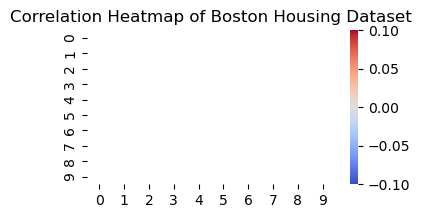

In [5]:
# Objective 2: Plot the heatmap to see
#====================================================================================

#  the correlation between variables
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Boston Housing Dataset')
plt.show()

In [11]:
# Objective 3: Implement linear regeression
#====================================================================================

# Split the data into features and target variable  
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1]   # Target variable (last column)

linreg = LinearRegression()
#linreg.fit(X, y)

In [18]:
from sklearn.linear_model import LinearRegression
linreg.fit(X, y)

ValueError: Found array with 0 sample(s) (shape=(0, 9)) while a minimum of 1 is required by LinearRegression.

In [9]:
# Objective 4: Evaluate the model using RMSE and MAE
#====================================================================================
# Make predictions on the training set
y_pred = linreg.predict(X)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
residual = y - y_pred
# Plot the residuals    
plt.figure(figsize=(8, 4))
plt.scatter(y_pred, residual, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

In [ ]:
# Compute the mean and standard deviation of residuals
mean_residual = np.mean(residual)
std_residual = np.std(residual)

# Define a threshold for outliers (e.g., 3 standard deviations) 
# Residuals greater than (3 \times standard deviation of residuals are often considered outliers.
threshold = 3 * std_residual

# Identify outliers
outliers = np.where(np.abs(residual - mean_residual) > threshold)[0]

# Ensure residual is a NumPy array or reset the index if it's a pandas Series
residual = np.array(residual)  # Convert to NumPy array if necessary

# Print the outlier indices and their residuals
print("Outlier Indices:", outliers)
print("Outlier Residuals:", residual[outliers])


In [ ]:
# Print the model parameters
print("Model Coefficients (slopes):", linreg.coef_)
print("Model Intercept:", linreg.intercept_)

In [ ]:
# Give a input case and predict the output
#====================================================================================
# I took 101th obervation from the data set 
# Input = [0.14866	0	8.56	0	0.52	6.727	79.9	2.7778	5	384	20.9	394.76	9.42]	
# Actual output = 27.5
#Lets try ro check this

actual_output = 27.5 # Actual output for the 101st observation
print(f"Actual output for the input case: {actual_output:.2f}")
input_case = np.array([0.14866,	0,	8.56,	0,	0.52,	6.727,	79.9,	2.7778,	5,	384,	20.9,	394.76,	9.42]).reshape(1, -1)
# Predict the output using the trained model
predicted_value = linreg.predict(input_case)
print(f"Predicted value for the input case: {predicted_value[0]:.2f}")
# Calculate the residual
residual = actual_output - predicted_value[0]
print(f"Residual: {residual:.2f}")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

polyreg = PolynomialFeatures(degree=4)
X_poly = polyreg.fit_transform(X)  # Transform the features to polynomial features
linreg_poly = LinearRegression()
linreg_poly.fit(X_poly, y)  # Fit the polynomial regression model   
# Make predictions on the training set using the polynomial model
y_pred_poly = linreg_poly.predict(X_poly)
# Calculate RMSE and MAE for polynomial regression
rmse_poly = np.sqrt(mean_squared_error(y, y_pred_poly))
mae_poly = mean_absolute_error(y, y_pred_poly)
print(f"Polynomial Regression RMSE: {rmse_poly:.2f}")
print(f"Polynomial Regression MAE: {mae_poly:.2f}")
# Plot the residuals for polynomial regression
plt.figure(figsize=(8, 4))
plt.scatter(y_pred_poly, y - y_pred_poly, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values (Polynomial)')
plt.ylabel('Residuals (Polynomial)')
plt.title('Residuals vs Predicted Values (Polynomial)')
plt.show()